In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/icecube-neutrinos-in-deep-ice/train_meta.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/sample_submission.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/test_meta.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/sensor_geometry.csv
/kaggle/input/icecube-neutrinos-in-deep-ice/test/batch_661.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_240.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_295.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_158.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_35.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_145.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_476.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_449.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_104.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_419.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_136.par

In [12]:
import numpy as np
import pandas as pd
import os

In [13]:
train=pd.read_parquet('/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_10.parquet')
test=pd.read_parquet('/kaggle/input/icecube-neutrinos-in-deep-ice/test/batch_661.parquet')

In [14]:
test = pd.read_parquet('/kaggle/input/icecube-neutrinos-in-deep-ice/sample_submission.parquet')
test.head(10)

,event_id,azimuth,zenith
0,2092,1,1
1,7344,1,1
2,9482,1,1


In [15]:
train.head()

,sensor_id,time,charge,auxiliary
event_id,,,,
29296372,2599,29807,1.125,True
29296372,711,30746,1.125,True
29296372,14,31649,1.225,True
29296372,5070,31890,0.725,True
29296372,5076,32030,0.625,True


In [16]:
sensor_geometry = pd.read_csv('/kaggle/input/icecube-neutrinos-in-deep-ice/sensor_geometry.csv')
sensor_geometry.head()

,sensor_id,x,y,z
0,0,-256.14,-521.08,496.03
1,1,-256.14,-521.08,479.01
2,2,-256.14,-521.08,461.99
3,3,-256.14,-521.08,444.97
4,4,-256.14,-521.08,427.95


In [17]:
train =  pd.read_parquet('/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_1.parquet')
print(train)
print(train.info())

          sensor_id   time  charge  auxiliary
event_id                                     
24             3918   5928   1.325       True
24             4157   6115   1.175       True
24             3520   6492   0.925       True
24             5041   6665   0.225       True
24             2948   8054   1.575       True
...             ...    ...     ...        ...
3266196        1961  17617   0.975       True
3266196          36  17705   0.625       True
3266196         356  18192   0.725       True
3266196        2826  18609   0.575       True
3266196        5013  18741   1.375       True

[32792416 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 32792416 entries, 24 to 3266196
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   sensor_id  int16  
 1   time       int64  
 2   charge     float64
 3   auxiliary  bool   
dtypes: bool(1), float64(1), int16(1), int64(1)
memory usage: 844.4 MB
None


In [18]:
import os
import pandas as pd

train_file_paths = []

for dirname, _, filenames in os.walk('/kaggle/input/icecube-neutrinos-in-deep-ice/train'):
    for filename in filenames:
        train_file_paths.append(os.path.join(dirname, filename))
                                              
# print(int(file_paths[0].split('/')[-1].split('_')[-1].split('.')[0]))       

train_file_paths  = sorted(train_file_paths,key=lambda x: int(x.split('/')[-1].split('_')[-1].split('.')[0]))

train =  pd.read_parquet(train_file_paths[0])

In [19]:
train =  pd.read_parquet(train_file_paths[0])
print(train_file_paths[0]) 
print(train.info()) 

/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_1.parquet
<class 'pandas.core.frame.DataFrame'>
Index: 32792416 entries, 24 to 3266196
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   sensor_id  int16  
 1   time       int64  
 2   charge     float64
 3   auxiliary  bool   
dtypes: bool(1), float64(1), int16(1), int64(1)
memory usage: 844.4 MB
None


In [20]:
train =  pd.read_parquet(train_file_paths[0])
#train.head(5)
print(train.loc[[24, 3266196]])

          sensor_id   time  charge  auxiliary
event_id                                     
24             3918   5928   1.325       True
24             4157   6115   1.175       True
24             3520   6492   0.925       True
24             5041   6665   0.225       True
24             2948   8054   1.575       True
...             ...    ...     ...        ...
3266196        1961  17617   0.975       True
3266196          36  17705   0.625       True
3266196         356  18192   0.725       True
3266196        2826  18609   0.575       True
3266196        5013  18741   1.375       True

[197 rows x 4 columns]


In [21]:
df=pd.read_parquet('/kaggle/input/icecube-neutrinos-in-deep-ice/train_meta.parquet')
df

,batch_id,event_id,first_pulse_index,last_pulse_index,azimuth,zenith
0,1,24,0,60,5.029555,2.087498
1,1,41,61,111,0.417742,1.549686
2,1,59,112,147,1.160466,2.401942
3,1,67,148,289,5.845952,0.759054
4,1,72,290,351,0.653719,0.939117
...,...,...,...,...,...,...
131953919,660,2147483597,24339210,24339349,5.895612,0.333071
131953920,660,2147483603,24339350,24339383,3.273695,1.503301
131953921,660,2147483617,24339384,24339424,2.945376,1.723253
131953922,660,2147483626,24339425,24339499,1.616582,1.937025


In [22]:
df.head(300)

,batch_id,event_id,first_pulse_index,last_pulse_index,azimuth,zenith
0,1,24,0,60,5.029555,2.087498
1,1,41,61,111,0.417742,1.549686
2,1,59,112,147,1.160466,2.401942
3,1,67,148,289,5.845952,0.759054
4,1,72,290,351,0.653719,0.939117
...,...,...,...,...,...,...
295,1,4933,53574,53643,1.157979,2.259761
296,1,4936,53644,53701,3.350446,0.812982
297,1,5000,53702,53830,1.768344,1.631434
298,1,5018,53831,53921,5.787715,2.644372


In [23]:
print("hi")

hi


In [24]:
df2=pd.read_parquet('/kaggle/input/icecube-neutrinos-in-deep-ice/test_meta.parquet')
df2.head(10)

,batch_id,event_id,first_pulse_index,last_pulse_index
0,661,2092,0,298
1,661,7344,299,334
2,661,9482,335,377


In [25]:
df4=pd.read_parquet('/kaggle/input/icecube-neutrinos-in-deep-ice/test/batch_661.parquet')
df4

,sensor_id,time,charge,auxiliary
event_id,,,,
2092,4066,6170,1.275,True
2092,3512,6374,0.975,True
2092,897,6378,1.475,True
2092,2060,6590,0.925,True
2092,3072,6625,1.075,True
...,...,...,...,...
9482,1133,13334,0.675,True
9482,2190,14112,1.075,True
9482,2057,14713,0.975,True


In [26]:
data1=pd.read_parquet('/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_1.parquet')


In [27]:
data1.head(30)

,sensor_id,time,charge,auxiliary
event_id,,,,
24,3918,5928,1.325,True
24,4157,6115,1.175,True
24,3520,6492,0.925,True
24,5041,6665,0.225,True
24,2948,8054,1.575,True
24,860,8124,0.675,True
24,2440,8284,1.625,True
24,1743,8478,0.775,True
24,3609,8572,1.025,True


In [28]:
ex1=data1[data1.index==24]

In [29]:
ex2=data1[(data1.index==24) & (data1['auxiliary']==False)]
print(ex2)

          sensor_id   time  charge  auxiliary
event_id                                     
24             5059   9868   1.375      False
24              558  12201   0.225      False
24              557  12206   1.225      False
24              557  12227   0.975      False
24              558  12339   1.225      False
24              557  12377   0.725      False
24              557  12436   0.175      False
24              553  12607   0.375      False
24              972  12723   0.475      False
24              973  12773   1.125      False
24              975  12818   0.675      False
24              560  13081   0.375      False
24              554  13262   0.725      False


In [30]:
pd.set_option('display.max_rows', None)

In [31]:
ex1=data1[data1.index==24]
print(ex1)

          sensor_id   time  charge  auxiliary
event_id                                     
24             3918   5928   1.325       True
24             4157   6115   1.175       True
24             3520   6492   0.925       True
24             5041   6665   0.225       True
24             2948   8054   1.575       True
24              860   8124   0.675       True
24             2440   8284   1.625       True
24             1743   8478   0.775       True
24             3609   8572   1.025       True
24             5057   8680   3.975       True
24             5057   8723   0.775       True
24             2977   8747   1.025       True
24             5059   9868   1.375      False
24             3496   9976   0.825       True
24             3161  10259   0.775       True
24             2959  10642   0.225       True
24             1397  10848   0.825       True
24             1970  10973   0.925       True
24             3387  11023   1.125       True
24             1583  11085   0.675

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# x1,y1,z1=sensor_geometry

In [33]:
sensor_id_select=ex2['sensor_id'].values[0]
x1,y1,z1=sensor_geometry[sensor_geometry['sensor_id']==sensor_id_select][['x','y','z']].values[0]
print(f'x1: {x1}, y1: {y1}, z1: {z1}')

x1: -9.68, y1: -79.5, z1: -219.49


In [34]:
sensor_id_select=ex2['sensor_id'].values[-1]
x2,y2,z2=sensor_geometry[sensor_geometry['sensor_id']==sensor_id_select][['x','y','z']].values[-1]
print(f'x2: {x2}, y2: {y2}, z2: {z2}')

x2: 35.54, y2: -364.83, z2: 259.42


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


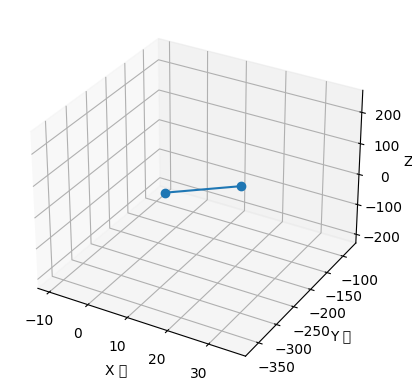

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.plot([x1, x2], [y1, y2], [z1, z2], marker='o', linestyle='-')

ax.set_xlabel('X 축')
ax.set_ylabel('Y 축')
ax.set_zlabel('Z 축')


plt.show()

In [36]:
import math
dx=x2-x1
dy=y2-y1
dz=z2-z1
azimuth_rad=math.atan2(dy,dx)
zenith_rad=math.asin(dz/ math.sqrt(dx**2+dy**2+dz**2))
print(azimuth_rad)
print(zenith_rad)

-1.4136203918978838
1.0280079620461717


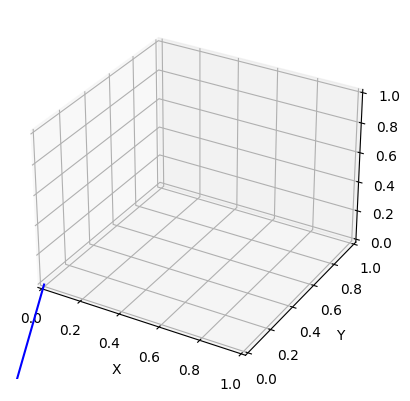

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 방위각과 고각
theta = 5.029555
phi = 2.087498

# 벡터의 길이
r = 1.0

# 극좌표를 직교좌표로 변환
x = r * np.sin(phi) * np.cos(theta)
y = r * np.sin(phi) * np.sin(theta)
z = r * np.cos(phi)

# 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 벡터를 원점에서 시작하여 (x, y, z)로 표시
ax.quiver(0, 0, 0, x, y, z, color='b')

# 축 설정
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

# 축 레이블
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


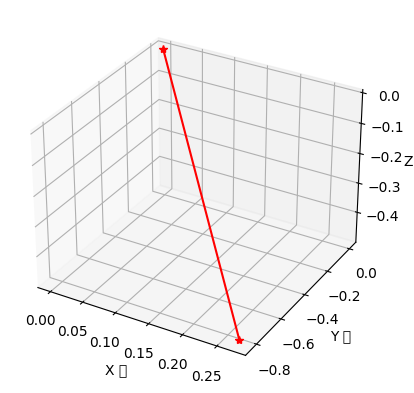

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')



ax.plot([0, x], [0, y], [0, z], marker='*', linestyle='-',color='red')



ax.set_xlabel('X 축')
ax.set_ylabel('Y 축')
ax.set_zlabel('Z 축')


plt.show()

In [39]:
unique_sensor1=ex2['sensor_id'].unique()
print(unique_sensor1)
print(len(unique_sensor1))

[5059  558  557  553  972  973  975  560  554]
9


In [40]:
for sensor_id1 in unique_sensor1:
    x, y, z = sensor_geometry[sensor_geometry['sensor_id'] == sensor_id1][['x', 'y', 'z']].values[0]
    print(f"Sensor ID: {sensor_id1}, x: {x}, y: {y}, z: {z}")


Sensor ID: 5059, x: -9.68, y: -79.5, z: -219.49
Sensor ID: 558, x: 35.54, y: -364.83, z: 191.34
Sensor ID: 557, x: 35.54, y: -364.83, z: 208.36
Sensor ID: 553, x: 35.54, y: -364.83, z: 276.44
Sensor ID: 972, x: -43.27, y: -267.52, z: 295.88
Sensor ID: 973, x: -43.27, y: -267.52, z: 278.85
Sensor ID: 975, x: -43.27, y: -267.52, z: 244.81
Sensor ID: 560, x: 35.54, y: -364.83, z: 157.3
Sensor ID: 554, x: 35.54, y: -364.83, z: 259.42


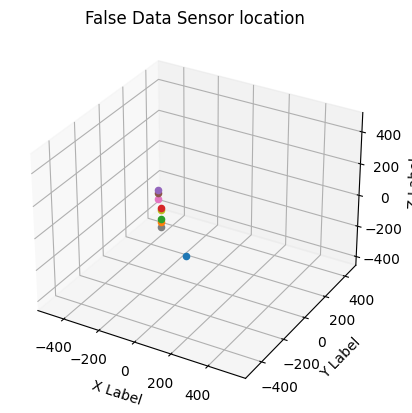

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3D 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for sensor_id1 in unique_sensor1:
    x, y, z = sensor_geometry[sensor_geometry['sensor_id'] == sensor_id1][['x', 'y', 'z']].values[0]
    ax.scatter(x, y, z, label=f'Sensor {sensor_id1}')

# 그래프에 레이블 추가
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_zlim(z_min, z_max)

# 그래프 제목 추가
plt.title('False Data Sensor location')

# 범례 추가



# 그래프 표시
plt.show()


In [49]:
unique_sensor2=ex1['sensor_id'].unique()
print(unique_sensor2)
print(len(unique_sensor2))

[3918 4157 3520 5041 2948  860 2440 1743 3609 5057 2977 5059 3496 3161
 2959 1397 1970 3387 1583 1940 1241  558  557 1405 3050  553  972  973
 2261  975  560  554 3276 4831 4571 3699  300  613 3438 2421 3115 4528
 2448 3289 4904 3452   48 3267  104]
49


In [50]:
for sensor_id2 in unique_sensor2:
    x, y, z = sensor_geometry[sensor_geometry['sensor_id'] == sensor_id2][['x', 'y', 'z']].values[0]
    print(f"Sensor ID: {sensor_id2}, x: {x}, y: {y}, z: {z}")

Sensor ID: 3918, x: 303.41, y: 335.64, z: 206.58
Sensor ID: 4157, x: -145.45, y: 374.24, z: 212.73
Sensor ID: 3520, x: 505.27, y: 257.88, z: -174.6
Sensor ID: 5041, x: -9.68, y: -79.5, z: 181.0
Sensor ID: 2948, x: 576.37, y: 170.92, z: 357.88
Sensor ID: 860, x: -290.66, y: -307.38, z: 163.61
Sensor ID: 2440, x: -526.63, y: -15.6, z: -178.17
Sensor ID: 1743, x: 500.43, y: -58.45, z: 450.79
Sensor ID: 3609, x: -313.6, y: 237.44, z: 348.01
Sensor ID: 5057, x: -9.68, y: -79.5, z: -205.47
Sensor ID: 2977, x: 576.37, y: 170.92, z: -135.72
Sensor ID: 5059, x: -9.68, y: -79.5, z: -219.49
Sensor ID: 3496, x: 505.27, y: 257.88, z: 233.9
Sensor ID: 3161, x: -234.95, y: 140.44, z: -197.79
Sensor ID: 2959, x: 576.37, y: 170.92, z: 170.65
Sensor ID: 1397, x: -245.65, y: -190.49, z: 212.13
Sensor ID: 1970, x: -324.39, y: -93.43, z: -350.9
Sensor ID: 3387, x: 257.31, y: 211.66, z: 44.86
Sensor ID: 1583, x: 124.97, y: -131.25, z: 102.18
Sensor ID: 1940, x: -324.39, y: -93.43, z: 159.72
Sensor ID: 1241,

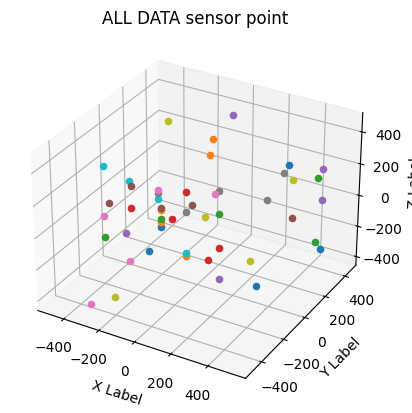

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3D 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for sensor_id2 in unique_sensor2:
    x, y, z = sensor_geometry[sensor_geometry['sensor_id'] == sensor_id2][['x', 'y', 'z']].values[0]
    ax.scatter(x, y, z, label=f'Sensor {sensor_id2}')

# 그래프에 레이블 추가
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_zlim(z_min, z_max)

# 그래프 제목 추가
plt.title('ALL DATA sensor point')

# 범례 추가

# 그래프 표시
plt.show()


In [53]:
unique_sensor2 = ex1['sensor_id'].unique()


x_min = float('inf')
x_max = float('-inf')
y_min = float('inf')
y_max = float('-inf')
z_min = float('inf')
z_max = float('-inf')

for sensor_id2 in unique_sensor2:
    x, y, z = sensor_geometry[sensor_geometry['sensor_id'] == sensor_id2][['x', 'y', 'z']].values[0]
    x_min = min(x_min, x)
    x_max = max(x_max, x)
    y_min = min(y_min, y)
    y_max = max(y_max, y)
    z_min = min(z_min, z)
    z_max = max(z_max, z)


print(f"x 최솟값: {x_min}, x 최댓값: {x_max}")
print(f"y 최솟값: {y_min}, y 최댓값: {y_max}")
print(f"z 최솟값: {z_min}, z 최댓값: {z_max}")

x 최솟값: -526.63, x 최댓값: 576.37
y 최솟값: -521.08, y 최댓값: 490.22
z 최솟값: -438.08, z 최댓값: 499.51
